This is an example how to read HDF5 files. 

In [ ]:
using Pkg; Pkg.add("HDF5") # If you need to install the HDF5 package

The file cannot be upload to github because it is larger than 100MB, so if you want to run it, here is the original .h5 file used: https://drive.google.com/file/d/15JW99rjHbqeMFcRu9Qn4115yg4VxcCzG/view?usp=sharing and place it in the data folder

In [8]:
using HDF5
using Images
using Plots
using Glob   # Search for files based on pattern matching

In [12]:
path=joinpath(pwd(),"data")  # Where to look for the data

"/Users/shaviv/julia-workshop-and-snippets/2-Data-Handling-Plotting/data"

In [13]:
h5files = glob("*.h5", path) # Find all HDF5 files in the path

1-element Vector{String}:
 "/Users/shaviv/julia-workshop-an" ⋯ 53 bytes ⋯ "21229.0835.061.2021229193506.h5"

Now let's open the first file (there might be just one) and get a file id:

In [24]:
fid = h5open(h5files[1],"r");

We can look at the different keys in the file:

In [25]:
file_keys = keys(fid);
println(file_keys)

["10*nscans:MODIS_SWATH_Type_L1B", "1KM_geo_dim:MODIS_SWATH_Type_L1B", "2*nscans:MODIS_SWATH_Type_L1B", "Band_1KM_Emissive", "Band_1KM_Emissive:MODIS_SWATH_Type_L1B", "Band_1KM_RefSB", "Band_1KM_RefSB:MODIS_SWATH_Type_L1B", "Band_250M", "Band_250M:MODIS_SWATH_Type_L1B", "Band_500M", "Band_500M:MODIS_SWATH_Type_L1B", "Change in relative responses of thermal detectors", "DC Restore Change for Reflective 1km Bands", "DC Restore Change for Reflective 250m Bands", "DC Restore Change for Reflective 500m Bands", "DC Restore Change for Thermal Bands", "Level 1B Swath Metadata", "Level 1B Swath Metadata_t", "MODIS_SWATH_Type_L1B", "Max_EV_frames:MODIS_SWATH_Type_L1B", "Noise in Thermal Detectors", "detectors per 1km band", "detectors per 250m band", "detectors per 500m band", "number of 1km reflective bands", "number of 250m bands", "number of 500m bands", "number of emissive bands", "number of scans"]


We can read the attributes of one of the objects

In [23]:
h5readattr(h5files[1], "/MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive") # Read the version attribute]

Dict{String, Any} with 9 entries:
  "band_names"       => "20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36"
  "radiance_offsets" => Float32[2730.58, 2730.58, 2730.58, 2730.58, 1077.44, 15…
  "units"            => "none"
  "DIMENSION_LIST"   => Vector{Reference}[[Reference(hobj_ref_t(0x0000000002e84…
  "long_name"        => "Earth View 1KM Emissive Bands Scaled Integers"
  "radiance_scales"  => Float32[6.2624f-5, 0.00314951, 6.9216f-5, 7.9104f-5, 3.…
  "radiance_units"   => "Watts/m^2/micrometer/steradian"
  "_FillValue"       => 0xffff
  "valid_range"      => UInt16[0x0000, 0x7fff]

And read the data (of all the bands)

In [27]:
data=h5read(h5files[1],"/MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive");

And display it. Note that the reverse and transpose is to set the orientation right.

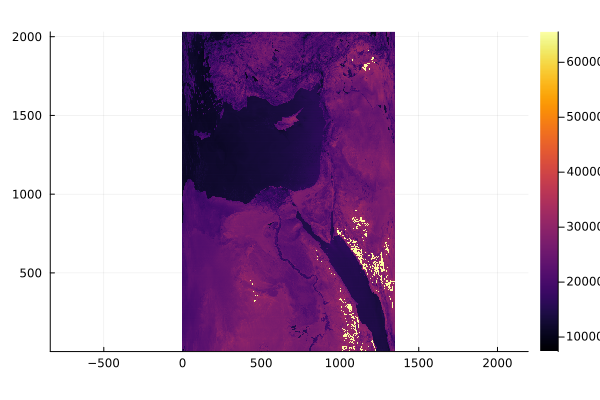

In [36]:
heatmap(reverse(data[:,:,3]',dims=1),aspect_ratio=1)